## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
from static_data import *

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

NOTE: exchange file names are defined in the static_data.py

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/' + exchange_1), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)



### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# five first and five last rows shown to approximate the time span of the data sample for bitstamp
pd.concat([bitstamp.head(), bitstamp.tail()])

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007


Observation: Three-month period per minute data sample ranging between 01-01-2018 and 03-31-2018

### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/' + exchange_2), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# five first and five last rows shown to approximate the time span of the data sample fro coinbase
pd.concat([coinbase.head(), coinbase.tail()])

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538


Observation: Three-month period per minute data sample ranging between 01-01-2018 and 03-31-2018

## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# check the number of NaN in each column before deciding how to hadnle them:
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [7]:
# check the % of NaN in each column before deciding how to hadnle them:
bitstamp.isnull().mean()

Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

In [8]:
# get general information about dataset to determine the type of data and the dataset size
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [9]:
# removing duplicate rows:
bitstamp = bitstamp.dropna()

In [10]:
# check dataset after missing value rows have been removed and validate the datatype of the "Close" column:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


Observation: column "Close" is still showing unexpected data type that needs to be hadnled

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [11]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

C:\Users\boris\AppData\Local\Temp\ipykernel_9384\3755717188.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


In [12]:
# check the datatype of the colmun "Close" after replacing $:
bitstamp.loc[:, "Close"] .dtypes

dtype('O')

Observation: The data type is still not as expected. We try to convert to float in the next step

### Step 3: Convert the data type of the Close column to a `float`.

In [13]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"]  = bitstamp.loc[:, "Close"] .astype("float")

C:\Users\boris\AppData\Local\Temp\ipykernel_9384\973183947.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  bitstamp.loc[:, "Close"]  = bitstamp.loc[:, "Close"] .astype("float")


In [14]:
# verify the bitstamp dataframe contains data types as expected:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


The data types are as expected. We can procede with checking for duplicates

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [15]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

Observation: no duplicated values are found in the dataset

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [16]:
# Repeat Steps 1–4 for the coinbase DataFrame

### Step 1: For the coinbase DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [17]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
# check the number of NaN in each column before deciding how to hadnle them:
coinbase.isnull().sum()

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [18]:
# check the % of NaN in each column before deciding how to hadnle them:
coinbase.isnull().mean()

Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

In [19]:
# get general information about dataset to determine the type of data and the dataset size
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [20]:
# removing duplicate rows:
coinbase = coinbase.dropna()

Additionally, the information above shows that "Close" column contains values that require attention as we would expect a float datatype for the closing prices

In [21]:
# check dataset after missing value rows have been removed and validate the datatype of the "Close" column:
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


Observation: column "Close" is still showing unexpected data type that needs to be hadnled

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [22]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

C:\Users\boris\AppData\Local\Temp\ipykernel_9384\3710113439.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")


In [23]:
# check the datatype of the colmun "Close" after replacing $:
coinbase.loc[:, "Close"] .dtypes

dtype('O')

Observation: The data type is still not as expected. We try to convert to float in the next step

### Step 3: Convert the data type of the Close column to a `float`.

In [24]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"]  = coinbase.loc[:, "Close"] .astype("float")

C:\Users\boris\AppData\Local\Temp\ipykernel_9384\470002398.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  coinbase.loc[:, "Close"]  = coinbase.loc[:, "Close"] .astype("float")


In [25]:
# verify the bitstamp dataframe contains data types as expected:
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


The datatypes are as expected. We can now procede with checking for the duplicates

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [26]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

0

No duplicated values are found in the dataset. We can start analyzing the data.

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


NOTE: Close column selected in the static_data.py

In [27]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, column_selection]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [28]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, column_selection]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [29]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [30]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp', ylabel='BTC Close'>

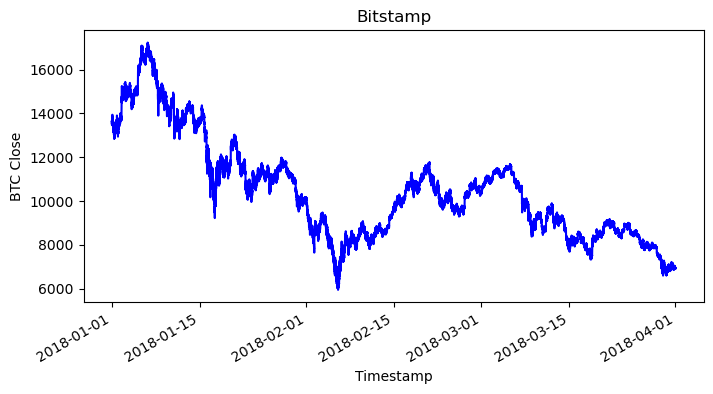

In [31]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(8, 4), title="Bitstamp", ylabel = "BTC " + column_selection,color="blue")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp', ylabel='BTC Close'>

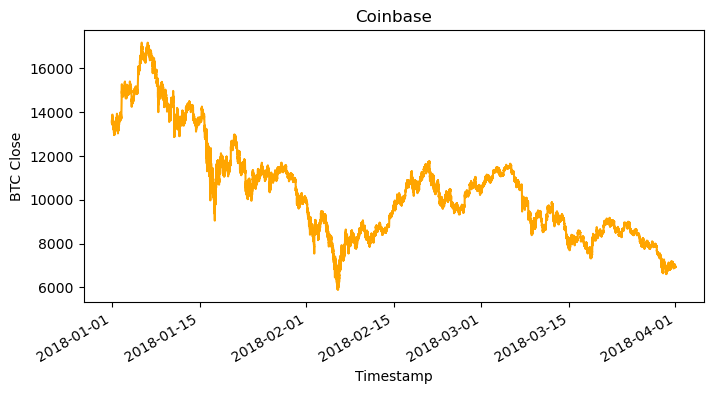

In [32]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(8, 4), title="Coinbase", ylabel = "BTC " + column_selection,color="orange")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp', ylabel='BTC Close'>

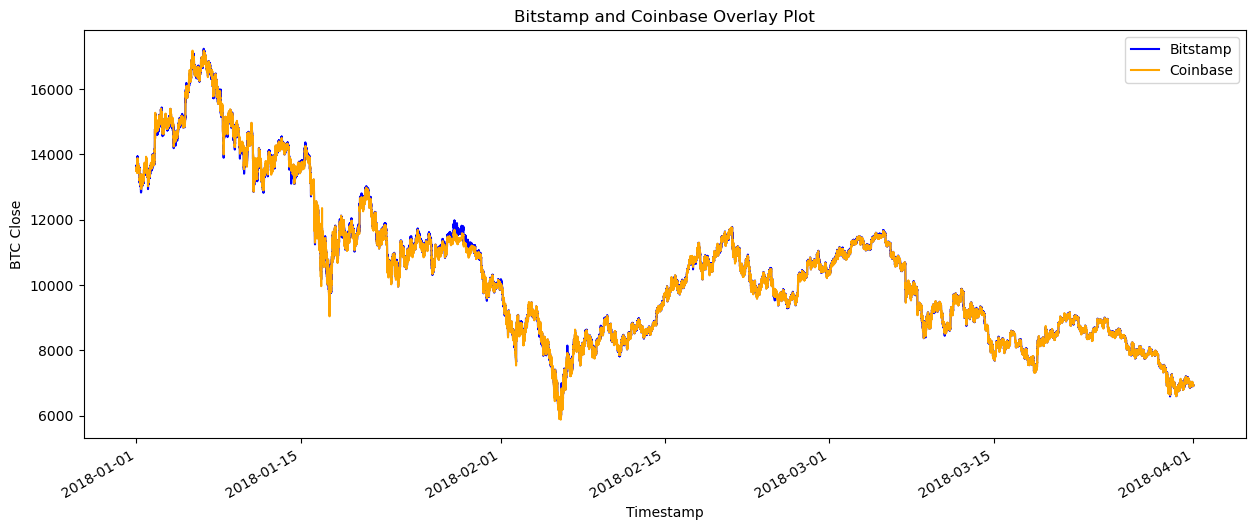

In [33]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15, 6), title="Bitstamp and Coinbase Overlay Plot", color="blue", ylabel = "BTC Close", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 6), color="orange", ylabel = "BTC " + column_selection, label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot Jan 2018'}, xlabel='Timestamp', ylabel='BTC Close'>

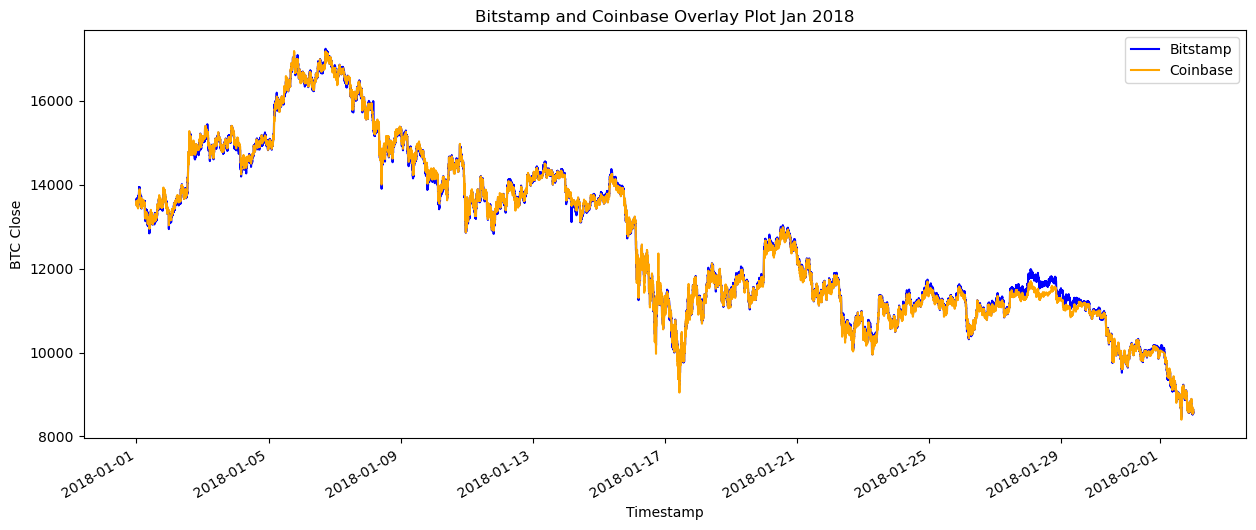

In [34]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 6), title="Bitstamp and Coinbase Overlay Plot Jan 2018", color="blue", ylabel = "BTC Close", label="Bitstamp")
coinbase_sliced.loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15, 6), color="orange", ylabel = "BTC " + column_selection, label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot Feb 2018'}, xlabel='Timestamp', ylabel='BTC Close'>

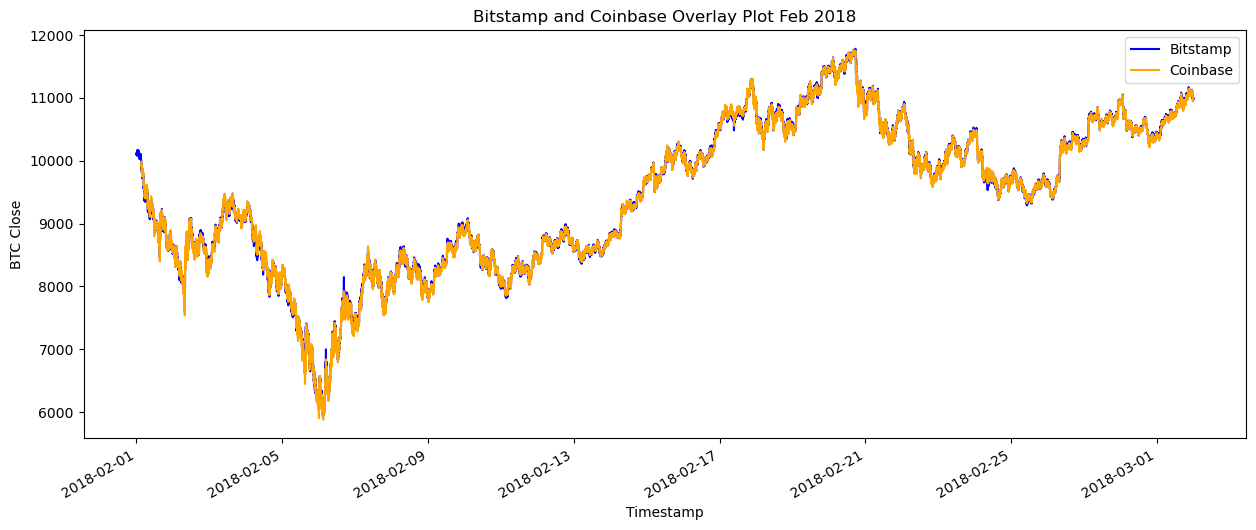

In [35]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(15, 6), title="Bitstamp and Coinbase Overlay Plot Feb 2018", color="blue", ylabel = "BTC Close", label="Bitstamp")
coinbase_sliced.loc['2018-02-01':'2018-03-01'].plot(legend=True, figsize=(15, 6), color="orange", ylabel = "BTC " + column_selection, label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot Feb 2018'}, xlabel='Timestamp', ylabel='BTC Close'>

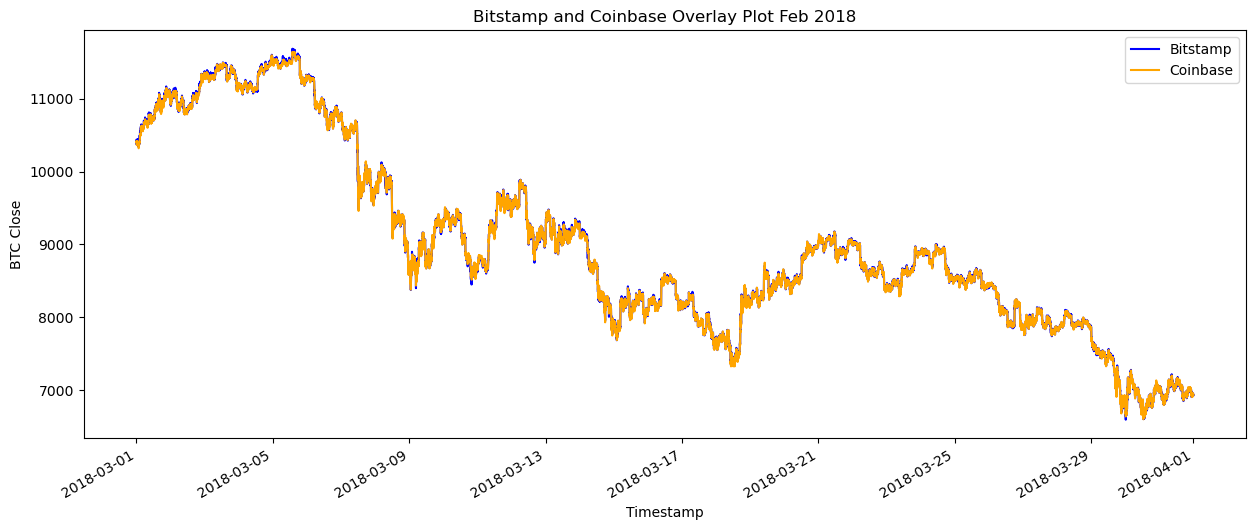

In [36]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 6), title="Bitstamp and Coinbase Overlay Plot Feb 2018", color="blue", ylabel = "BTC Close", label="Bitstamp")
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 6), color="orange", ylabel = "BTC " + column_selection, label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Just from looking at the graphs of the three periods it seems that the spread got smaller some time after mid Feb 2018 onwards

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

NOTE: dates are selected in the static_data.py

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot 2018-01-08'}, xlabel='Timestamp', ylabel='BTC Close'>

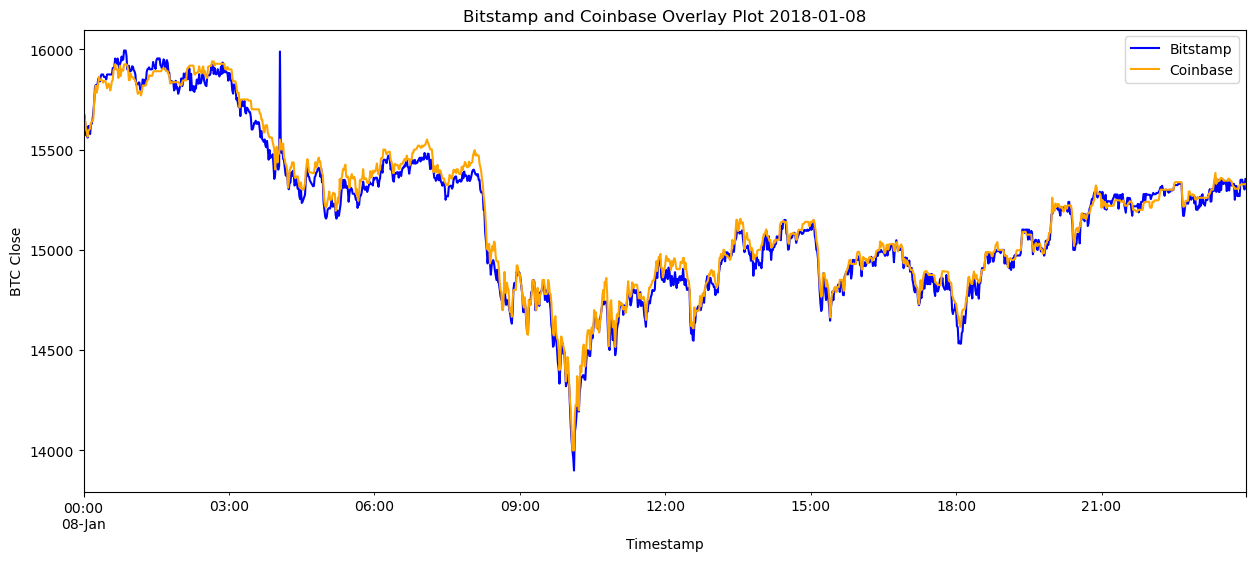

In [37]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc[early].plot(legend=True, figsize=(15, 6), title="Bitstamp and Coinbase Overlay Plot " + early, color="blue", ylabel ="BTC " + column_selection, label="Bitstamp")
coinbase_sliced.loc[early].plot(legend=True, figsize=(15, 6), color="orange", ylabel = "BTC " + column_selection, label="Coinbase")

In [38]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc[early] - bitstamp_sliced.loc[early]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       26.727347
std        40.193978
min      -439.050000
25%        -0.022500
50%        27.435000
75%        54.002500
max       155.410000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 2018-01-08'}>

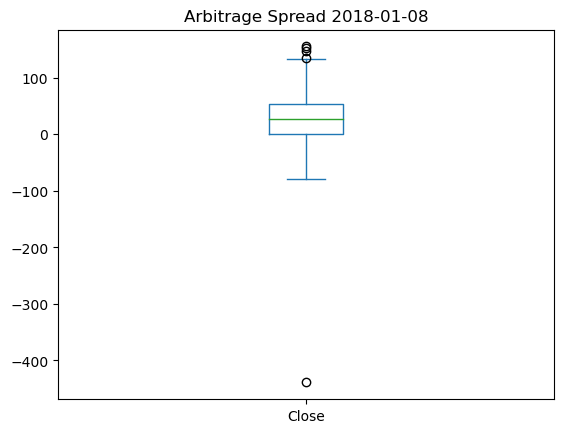

In [39]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", title = "Arbitrage Spread " + early)

Observation: On aevrage coinbase had higher Closing prices for this date. However, there were quite large negative outliers suggesting the opportunities might have existed when shorting bitstamp as well.

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot 2018-02-15'}, xlabel='Timestamp', ylabel='BTC Close'>

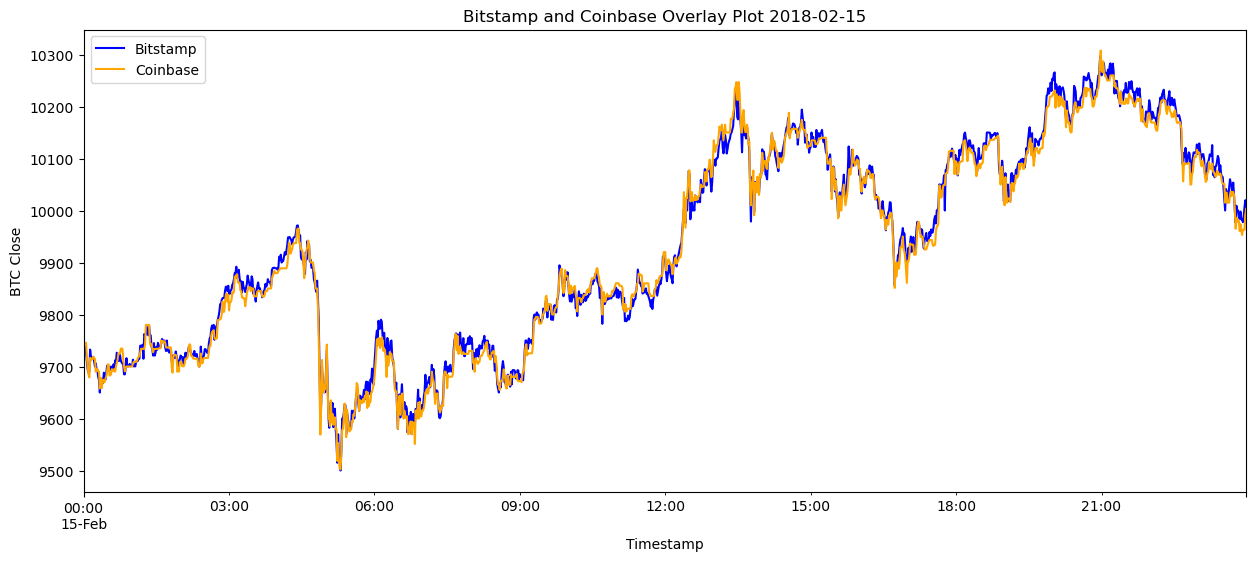

In [40]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc[middle].plot(legend=True, figsize=(15, 6), title="Bitstamp and Coinbase Overlay Plot " + middle, color="blue", ylabel = "BTC " + column_selection, label="Bitstamp")
coinbase_sliced.loc[middle].plot(legend=True, figsize=(15, 6), color="orange", ylabel = "BTC " + column_selection, label="Coinbase")

In [41]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc[middle] - bitstamp_sliced.loc[middle]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -5.760007
std        14.908671
min       -55.470000
25%       -16.217500
50%        -6.960000
75%         3.995000
max        48.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 2018-02-15'}>

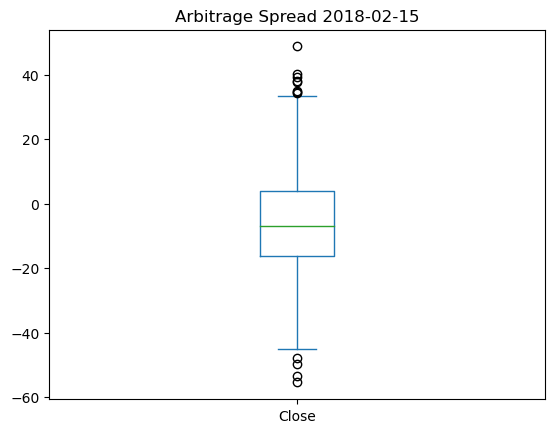

In [42]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", title = 'Arbitrage Spread ' + middle)

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot 2018-03-14'}, xlabel='Timestamp', ylabel='BTC Close'>

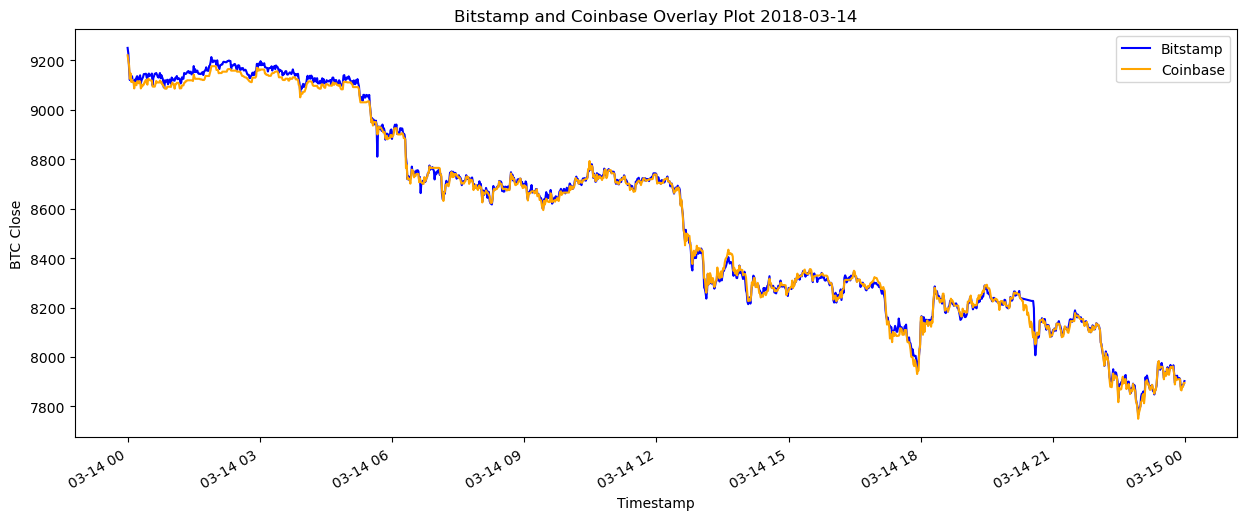

In [43]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc[late].plot(legend=True, figsize=(15, 6), title="Bitstamp and Coinbase Overlay Plot " + late, color="blue", ylabel = "BTC " + column_selection, label="Bitstamp")
coinbase_sliced.loc[late].plot(legend=True, figsize=(15, 6), color="orange", ylabel = "BTC " + column_selection, label="Coinbase")

In [44]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc[late] - bitstamp_sliced.loc[late]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1425.000000
mean       -6.731404
std        16.322187
min      -147.650000
25%       -16.600000
50%        -6.000000
75%         2.910000
max        90.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread 2018-03-14'}>

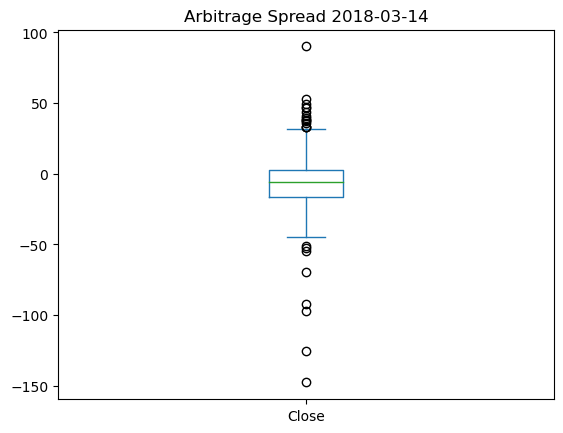

In [45]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title = 'Arbitrage Spread ' + late)

Observation: Also on this date the mean is negative and close to "0" but the distributon is skewed to the left with negative outliers being more pronounced. We can extrapolate that a) it makes sense to by on conibase and sell on bitstamp and b) due to such large outliers there still might be a profitable arbitrage opportunity even though on average the prices on both exchanges were close.

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [46]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc[early] - bitstamp_sliced.loc[early]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame where the spead is greater than 0
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1070.000000
mean       43.628869
std        28.211180
min         0.010000
25%        20.067500
50%        40.705000
75%        61.442500
max       155.410000
Name: Close, dtype: float64

In [47]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# note: based on the previous section bitstamp was selected as a highr-priced exchange for this date
arbitrage_spread_middle = bitstamp_sliced.loc[middle] - coinbase_sliced.loc[middle]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    970.000000
mean      13.963979
std        9.337793
min        0.010000
25%        6.715000
50%       12.735000
75%       19.667500
max       55.470000
Name: Close, dtype: float64

In [48]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
# note: based on the previous section bitstamp was selected as a highr-priced exchange for this date
arbitrage_spread_late =  bitstamp_sliced.loc[late] - coinbase_sliced.loc[late]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    956.000000
mean      14.774121
std       12.422690
min        0.010000
25%        5.912500
50%       11.935000
75%       21.350000
max      147.650000
Name: Close, dtype: float64

Observation: just by looking at the positive arbitrage spreads of the three chosen dates we can notice that in terms of absolute spreads the early date shows the largest arbitrage opportunity (fees excluded) with a mean being 43.63 and max observation equal to 155.41. The middle of the sample shows the smallest opportunity for arbitrgae profit as it has the lowest mean of 13.96 and other values are the lowest in the sample of three. The late date, although with a mean of 14.77, has high max of 147.65.

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [49]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/bitstamp_sliced.loc[early]

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-08 00:00:00         NaN
2018-01-08 00:01:00         NaN
2018-01-08 00:02:00    0.000687
2018-01-08 00:03:00    0.001854
2018-01-08 00:04:00    0.000710
                         ...   
2018-01-08 23:55:00         NaN
2018-01-08 23:56:00    0.000763
2018-01-08 23:57:00    0.001701
2018-01-08 23:58:00         NaN
2018-01-08 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

In [50]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]/coinbase_sliced.loc[middle]

# Review the spread return DataFrame
spread_return_middle

Timestamp
2018-02-15 00:00:00         NaN
2018-02-15 00:01:00         NaN
2018-02-15 00:02:00         NaN
2018-02-15 00:03:00         NaN
2018-02-15 00:04:00         NaN
                         ...   
2018-02-15 23:55:00    0.001554
2018-02-15 23:56:00    0.002714
2018-02-15 23:57:00    0.004448
2018-02-15 23:58:00    0.002838
2018-02-15 23:59:00    0.000300
Name: Close, Length: 1440, dtype: float64

In [51]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0]/coinbase_sliced.loc[late]

# Review the spread return DataFrame
spread_return_late

Timestamp
2018-03-14 00:00:00    0.003254
2018-03-14 00:01:00    0.003127
2018-03-14 00:02:00         NaN
2018-03-14 00:03:00         NaN
2018-03-14 00:04:00         NaN
                         ...   
2018-03-14 23:55:00    0.001116
2018-03-14 23:56:00    0.000893
2018-03-14 23:57:00    0.000288
2018-03-14 23:58:00         NaN
2018-03-14 23:59:00    0.000955
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [52]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-08 05:17:00    0.010226
2018-01-08 10:19:00    0.010637
Name: Close, dtype: float64

In [53]:
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [54]:
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [55]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    2.000000
mean     0.010432
std      0.000291
min      0.010226
25%      0.010329
50%      0.010432
75%      0.010534
max      0.010637
Name: Close, dtype: float64

In [56]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [57]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

Observation: the erly date has only two instances of profitable trades, while the late date has four instances with larger mean and other statistics. There were no arbitrage opportunities on the middle date when adjusting for the 1% trading fee.
The lower number of profitable trades and overall statistics in the early sample can be explaind by the large base price (the price level in Jan 2018 where almost twice higher than in Mar 2018). Those price levels had a significant impact on the relative profits (% rather than absolute value of the spread) making arbitrage less interesting in the environment of high BTC prices when adjusting for trading fees.

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [58]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc[early]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-08 05:17:00    155.41
2018-01-08 10:19:00    152.91
Name: Close, dtype: float64

In [59]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced.loc[middle]

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [60]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced.loc[late]

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Timestamp
2018-03-14 20:31:00     91.89
2018-03-14 20:32:00    125.63
2018-03-14 20:33:00    147.65
2018-03-14 20:34:00     97.22
Name: Close, dtype: float64

Observation: as expected, after adjusting for fees the profit per trade was higher in the early date as the price divergence between exchanges was larger (seen as absolute spreads)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [61]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      2.000000
mean     154.160000
std        1.767767
min      152.910000
25%      153.535000
50%      154.160000
75%      154.785000
max      155.410000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Profit 2018-01-08'}, xlabel='Timestamp'>

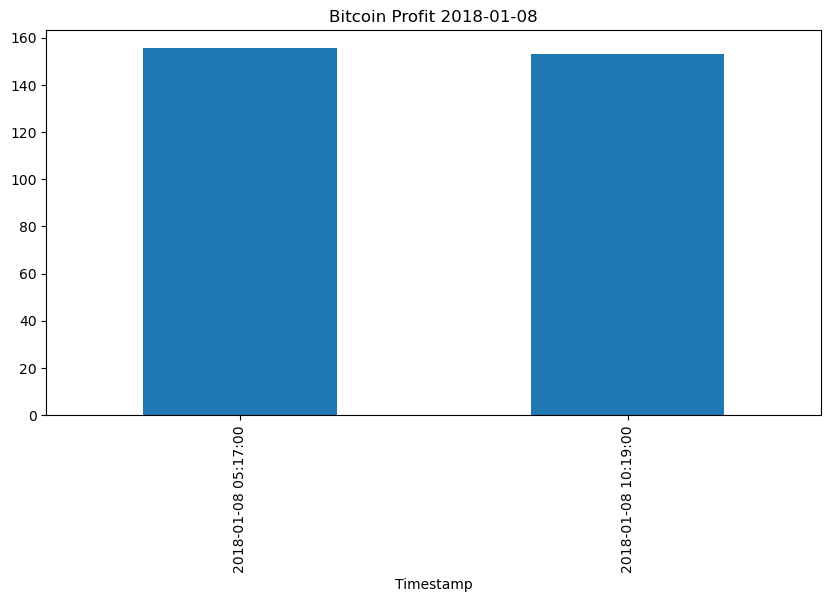

In [62]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 5), title="Bitcoin Profit " + early, kind = 'bar')

In [63]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Profit 2018-02-15'}, xlabel='Timestamp'>

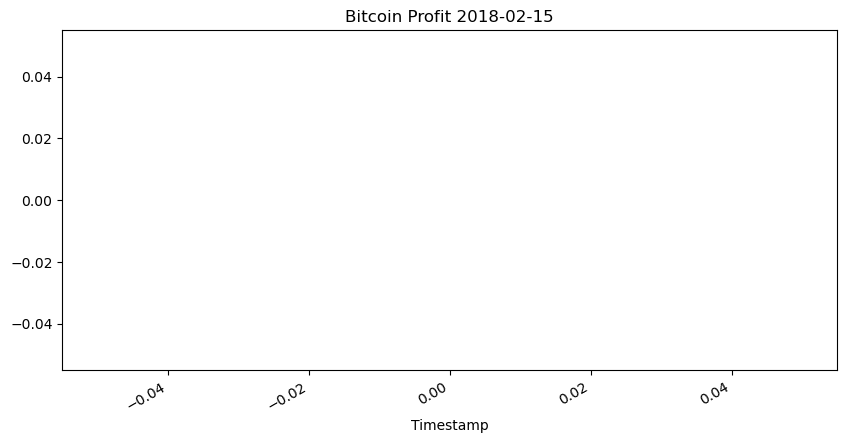

In [64]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10, 5), title="Bitcoin Profit " + middle)

In [65]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count      4.000000
mean     115.597500
std       25.998666
min       91.890000
25%       95.887500
50%      111.425000
75%      131.135000
max      147.650000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Profit 2018-03-14'}, xlabel='Timestamp'>

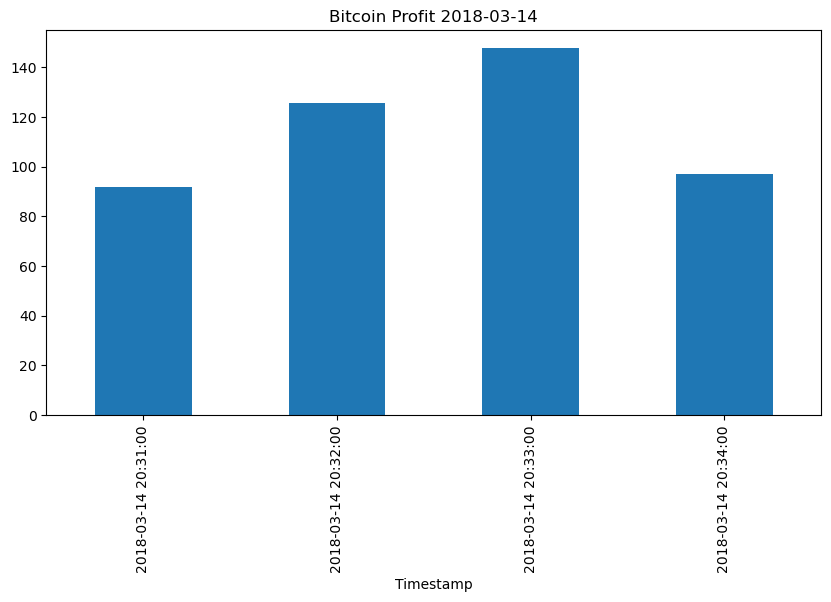

In [66]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10, 5), title="Bitcoin Profit " + late, kind='bar')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [67]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

308.3199999999997

In [68]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()

0.0

In [69]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()

462.3899999999976

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [70]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profit 2018-01-08'}, xlabel='Timestamp'>

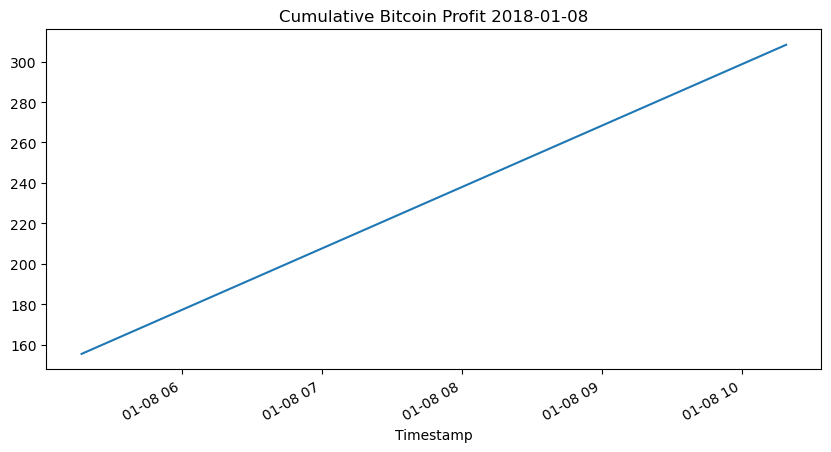

In [71]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 5), title="Cumulative Bitcoin Profit " + early)

In [72]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profit 2018-02-15'}, xlabel='Timestamp'>

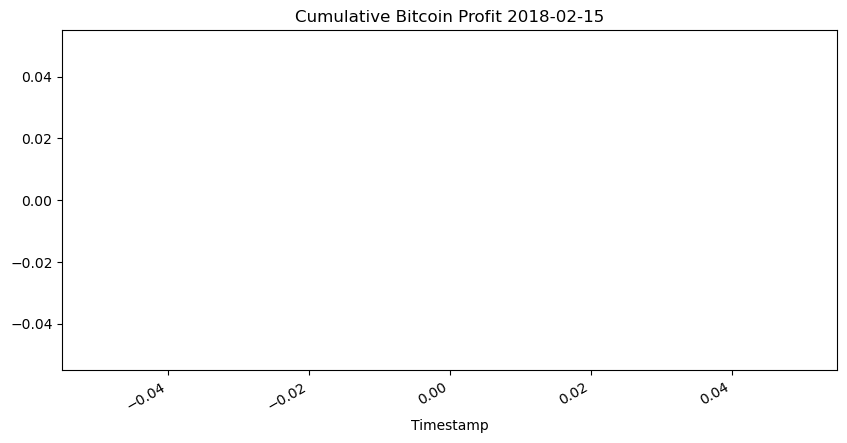

In [73]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10, 5), title="Cumulative Bitcoin Profit " + middle)

In [74]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profit 2018-03-14'}, xlabel='Timestamp'>

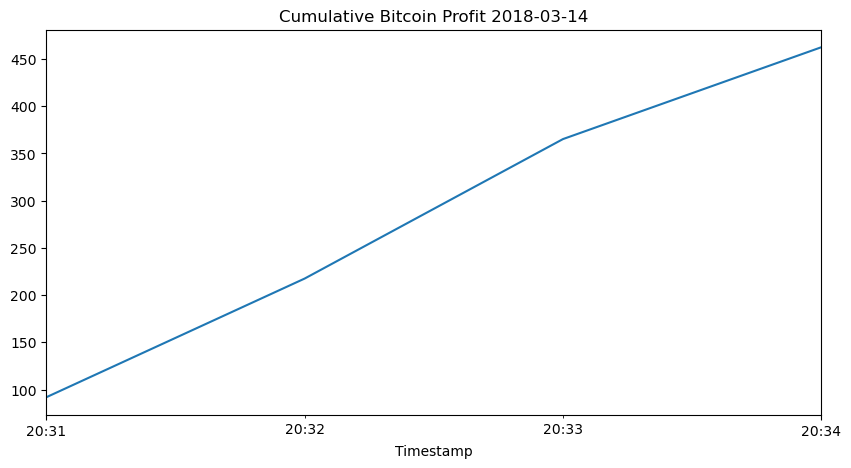

In [75]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10, 5), title="Cumulative Bitcoin Profit " + late)

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 

# Report: BTC Arbitrage Opportunities Between Bitstamp and Coinbase in Q1 2018

## Introduction

This report covers the analyzis of the Q1 2018 trade data (frequncy = minutes) for Bitcoin on two exchanges: Bitstamp and Coinbase. The purpose of the analysis is to determine if any arbitrage opportunities existed for Bitcoin during the sample period and to estimate the potential profits that could be made. <br/>
NOTE: BTC Closing prices were selected for the analysis.

## Summary statistics and data visualization:

As a starting point, the Closing BTC prices on both exchanges were analysed.

* Bitstamp summary:

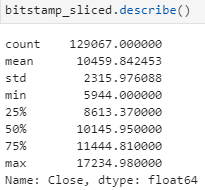

* Coinbase summary:

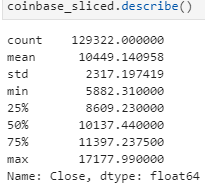

*```Observation 1```: There was a price divergence between the two exchanges during the reporting period. The statistics also suggest that on average Bitstamp had higher prices relative to Coinbase.*

To test this observation further, visual checks were performed on the whole data set as well as by splitting the data into three equivalent time periods:

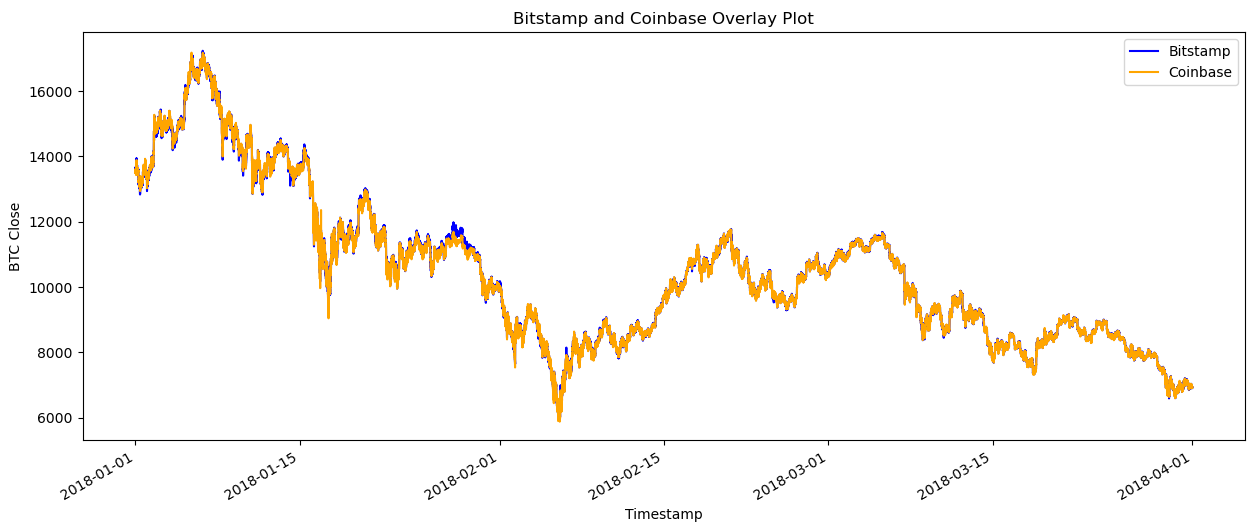

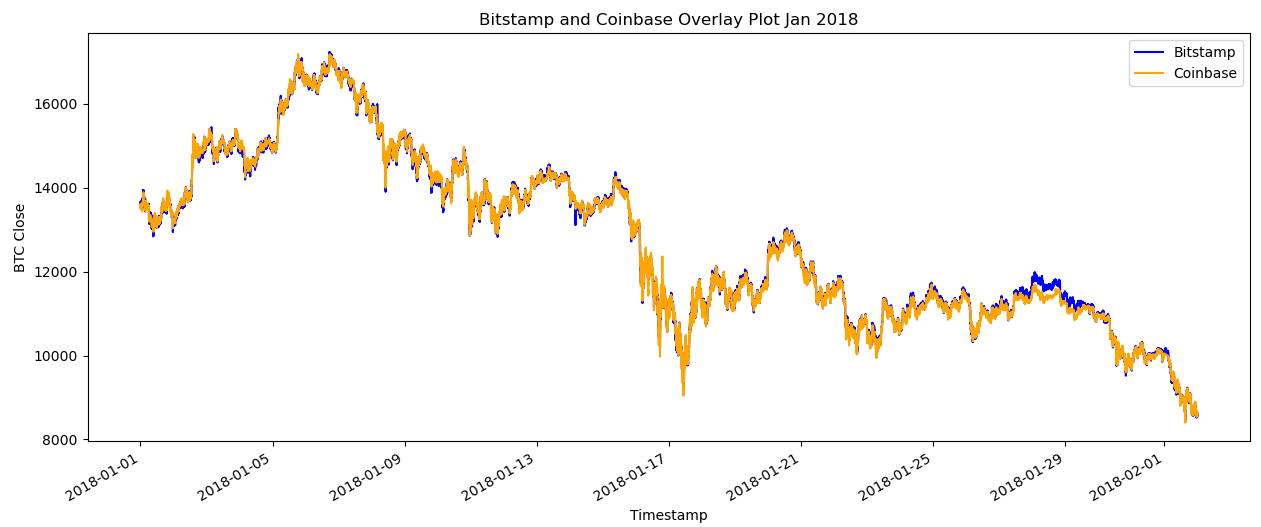

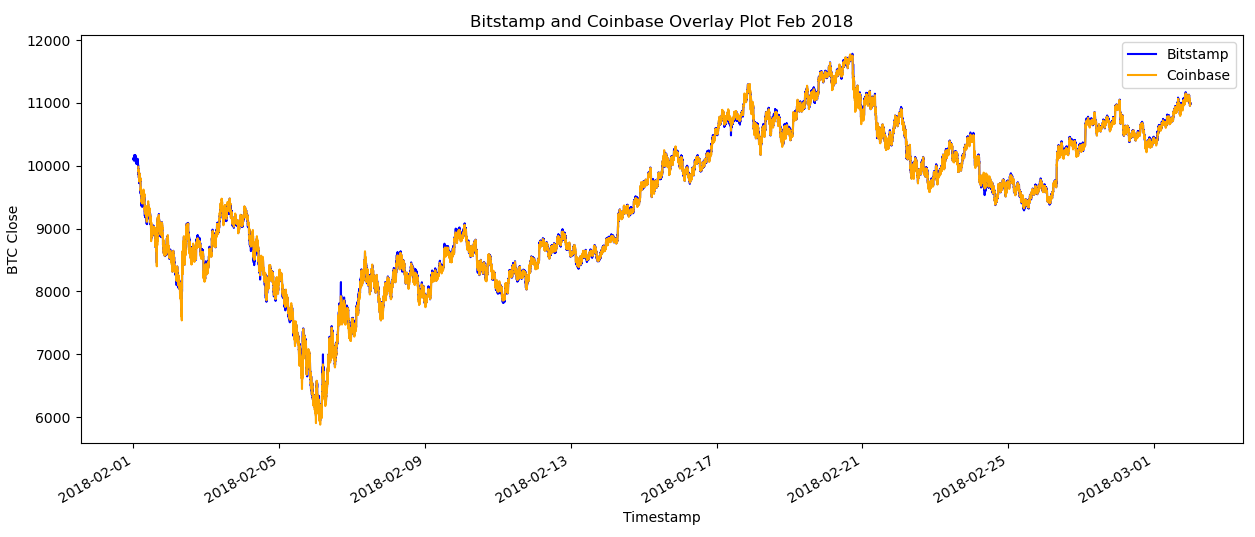

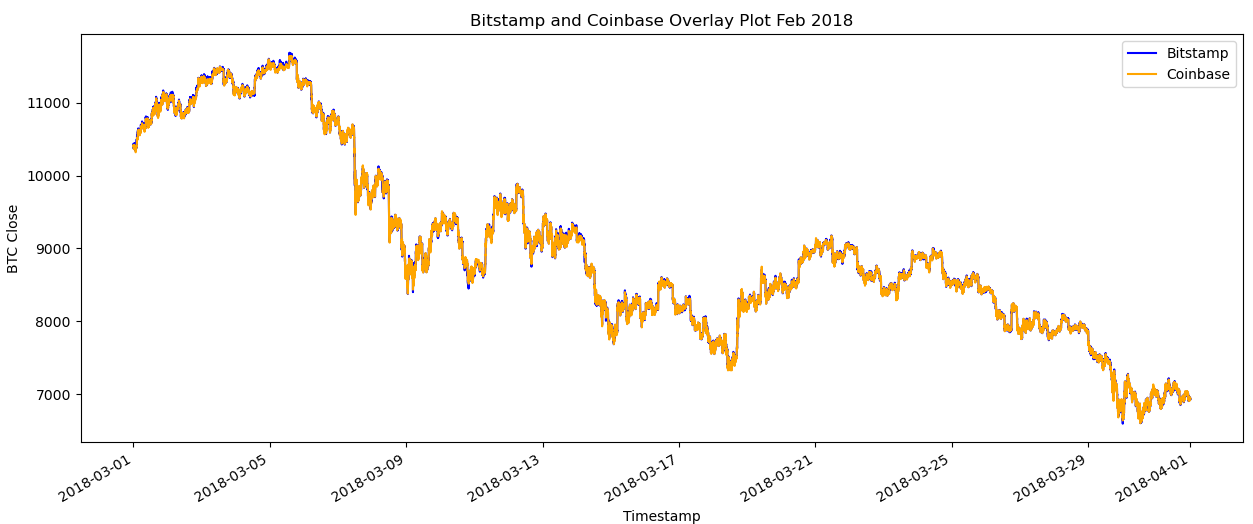

The graphs above confirm the price divergence between exchanges but do not allow to draw a definitive conclusion as to whcih exchnage is more expensive.
Another observation can be made by looking at the graphs:

*```Observation 2```: The price difference between exchanges seems to be getting smaller some time around mid Feb 2018 onwards*

## Zooming into specific dates

As Observation 2 did not provide a conclusive evidence of clear arbitrage opportunities between Coinbase and Bitmap, more focused analysis was performed by selecting three days from the beginning, middle and end of the data sample:

* early period = '2018-01-08'
* middle period = '2018-02-15'
* late period = '2018-03-14'

The analysis centered on the price differences (spreads) for the selected dates, initally assuming that Coinbase was more expensive and therefore the Bitsamp Closing price was deducted from the Coinbase Closing to determine the spread. The summary statistics and the box plots of the spreads are presented below:

* Jan 8 2018:

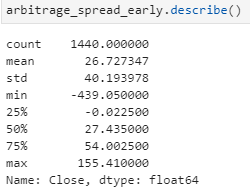

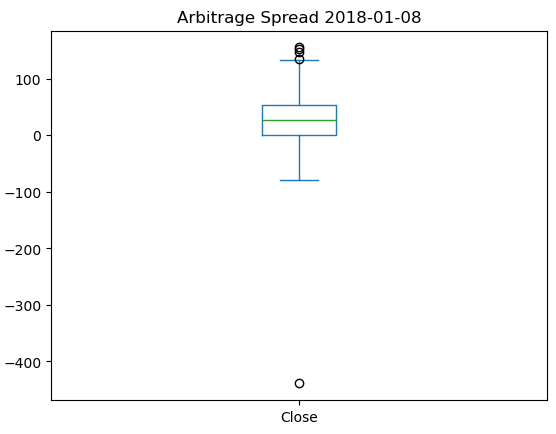

*```Observation 3```: On average Coinbase had higher Closing prices on Jan 8 2018. However, there were quite large negative outliers suggesting the opportunities might have existed when shorting Bitstamp as well.*

* Feb 15 2018:

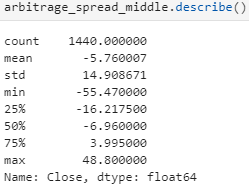

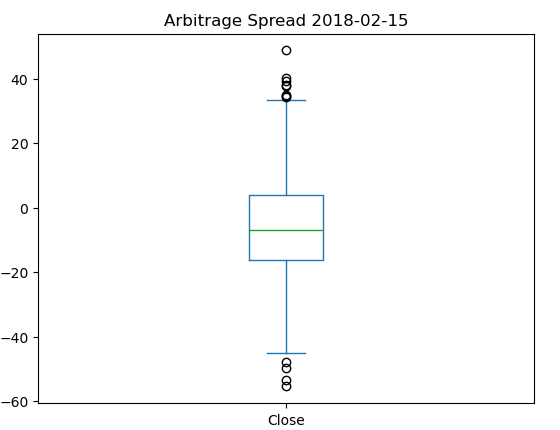

*```Observation 4```: The difference in closing prices between two exchanges is on average close to "0", while being slightly negative. Also outliers are spread quite evenly. This suggests that (a) Bitstamp, having higher closing prices, would be a better candidate for selling on this date, (b) as the difference in prices is so close to "0", there might be no profitable opportunities on this day, when deducting the trading fee! and (c) the price convergence was quite high on Feb 15*

* Mar 14 2018:

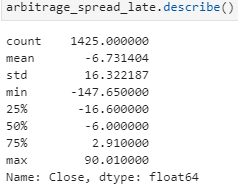

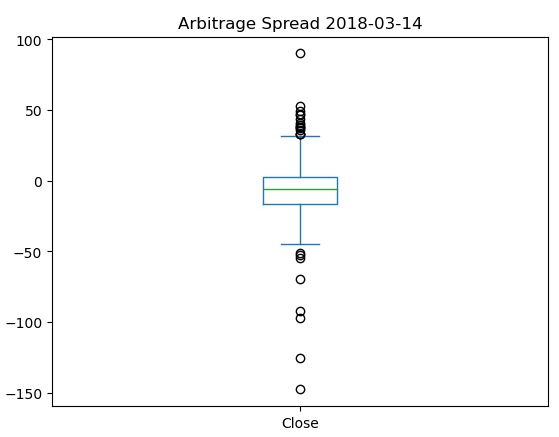

*```Observation 5```: Also on the 14th of Mar 2018 the mean is negative and close to "0" but the distributon is skewed to the left with negative outliers being more pronounced. We can extrapolate that (a) it makes sense to by on Conibase and sell on Bitstamp, (b) due to such large outliers there still might be a profitable arbitrage opportunity even though on average the prices on both exchanges were close and (c) the price divergence seemed higher on Mar 14 than on Feb 15, although significantly lower than on Jan 8.
Overall, The above daily spread analyzis supports Observation 1 suggesting that for most of the period Bitstamp was more expensive and therefore, to enjoy the arbitrage opportunities it would have been reasonable to purchase on Coinbase and sell on Bitstamp. Also, based on the above analyzes it seems that the highest price alignment was observed in the mid Feb 2018.*

## Estimating arbitrage profit for the selected dates.

When estimating arbitrage profits for the selected dates, the following measures where tested:
1) Arbitrage spread between the two exchanges calculated by subtracting the lower-priced exchange from the higher-priced one. <br/> 
NOTE: as per above conclusion, for Jan 8 2018 Coinbase was selected as more expensive, while for the latter dates Bitstamp was assumed to be more expensive
The below statistics are provided for the selection of positive spreads:

* Jan 8 2018:

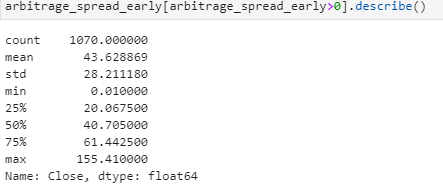

* Feb 15 2018:

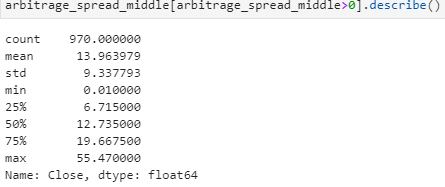

* Mar 14 2018:

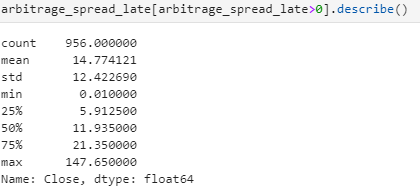

*```Observation 6```: by looking at the positive arbitrage spreads of the three chosen dates we can notice that in terms of absolute spreads Jan 8 shows the largest arbitrage opportunity (when excluding for the fees) with a mean of 43.63 and max observation equal to 155.41. Feb 15 indicates the smallest opportunity for the arbitrgae profit, as it has the lowest of three mean equal to 13.96 and other values are the lowest in the sample of three as well. Mar 14, although with a mean of 14.77, has high max of 147.65 suggesting possible opportunities. This statement also support Observations 4(c) and 5(c)*

2) Spread returns, calculated by dividing the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange) and determine the number of times your trades with positive returns (profitable trades) exceed the 1% minimum threshold that you need to cover your costs.


* Jan 8 2018:

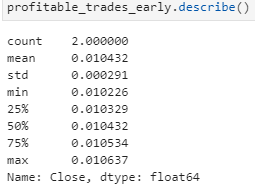

* Feb 15 2018:

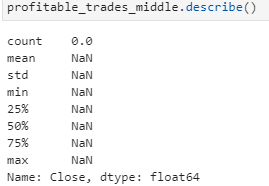

* Mar 14 2018:

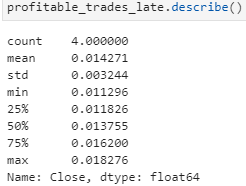

*```Observation 7```: after adjusting for the 1% trading fee, Jan 8 had only two instances of profitable trades, while Mar 14 had four instances with larger mean and other statistics. There were no arbitrage opportunities on Feb 15, again giving support to the Observations 4(c) and 5(c) about the price convergence on this date.
The lower number of profitable trades and overall statistics in the Jan 8 sample can be explaind by the large base price (the price level in Jan 2018 was almost twice higher than in Mar 2018). Those price levels had a significant impact on the relative profits (% rather than absolute value of the spread) making arbitrage less interesting in the environment of high BTC prices after adjusting for trading fees. NOTE: the outcome for Feb 15 is supporting Observation 4(b) that suggested that there might be no profitable opportunities on this date.*

3) Dollar profit per trade, determined by multiplying the spread returns that were greater than 1% by the cost of what was purchased and dropping any missing values from the resulting DataFrame.


* Jan 8 2018:

Two profitable trades were identified with a cumulative profit of $308.32:

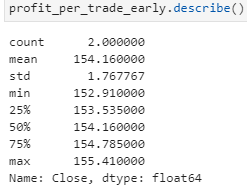

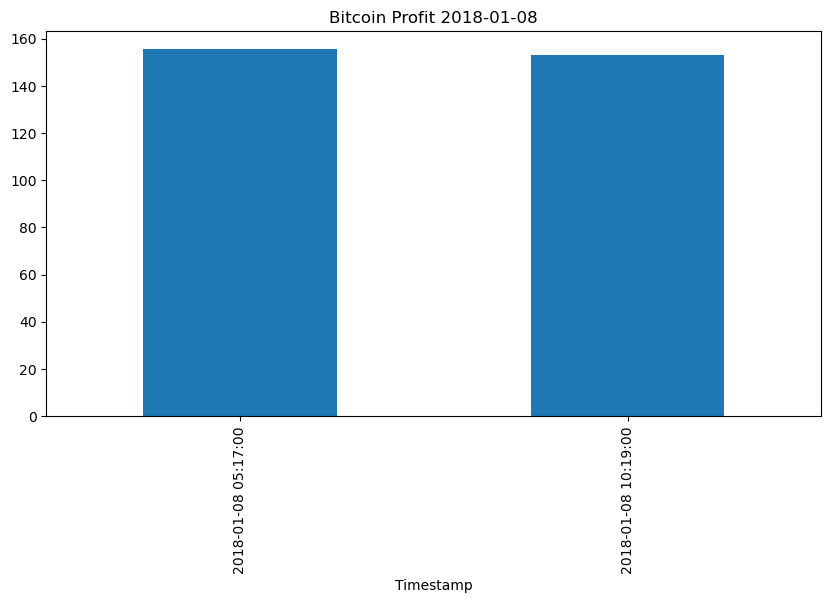

* Feb 15 2018:

No profitable trades were identified on this date:

* Mar 14 2018:

Four profitable trades were identified with a cumulative profit of $462.39 (this finding also supports Observation 5(b) which suggested that large outliers can result in possible profitable opportunities on this day):

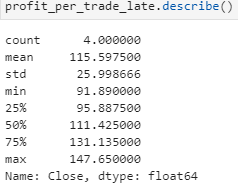

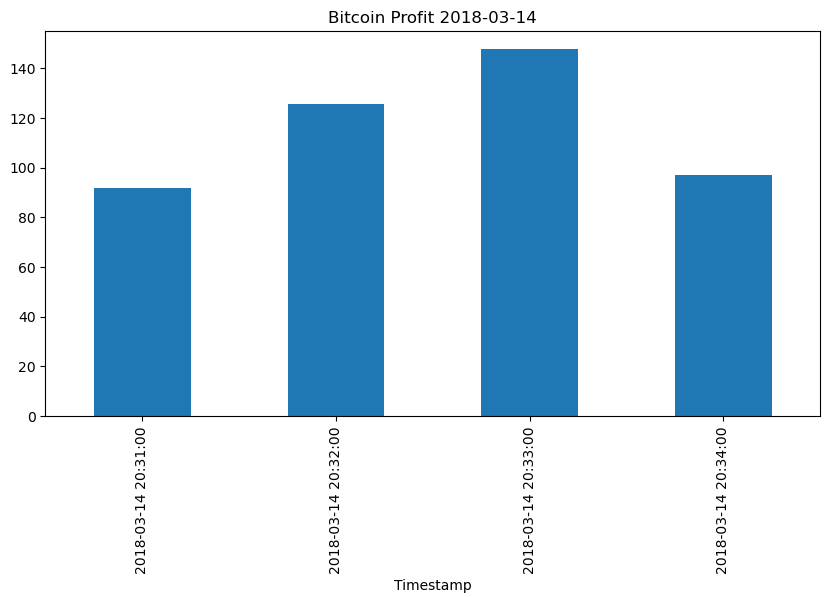


*```Observation 8```: as expected, after adjusting for fees the profit per trade was higher in Jan 2018 as the price divergence between exchanges was larger (seen as absolute spreads)*


## Conclusion

- Based on the graphical and statistical analyzes a pattern of price convergence between exchanges can be observed over the selected time period and particularly in the middle of Feb 2018. 

- Despite the convergence, as BTC price declined significantly during Jan 2018 - Mar 2018, the opportunities to profit from arbitrage increased in Mar 2018. <br/>Bitcoin price level had a significant inverse impact on the relative returns from arbitrage and although the absolute spreads were larger in Jan 2018, when accounting for 1% fee, implementing the arbitrage strategy proved less atractive in Jan 2018, compared to Mar 2018, when BTC price level dropped to around $8k from 13.5k in Jan 2018. Consequently although BTC price between exchanges began to converge, lower absolute price level allowed for higher arbitrage profits to be made in Mar 2018 vs Jan 2018.

- Another interesting trend observed, when zooming into specific dates, was that Coinbase became cheaper than Bitstamp during Q1 2018. This is an important obervation as, if confirmed by a larger sample of observations, it became more attractive to buy on Coinbase and sell on Bitstamp.

**NOTE:** Based on the small data sample (only three days from the 3-months period) it is impossible to draw definitive conclusions that can apply to the whole period. Therefore it would be advisable to analyze a larger sample of days as well as include other maeasures, such as volumes on the exchnages to get more insight into the correlation between price levels, trading volumes, price convergence and a potential arbitrage opportunities between different exchanges**